# Exploring the Datasets and Database Given

- bom.movie_gross.csv.gz 
- im.db.zip 
- rt.movie_info.tsv.gz 
- rt.reviews.tsv.gz
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

-------------------------------------------------------------------------

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## The Data
Movie datasets are from:
- Box Office Mojo
- IMDB
- Rotten Tomatoes
- The MovieDB
- The Numbers


#### SQLite Database
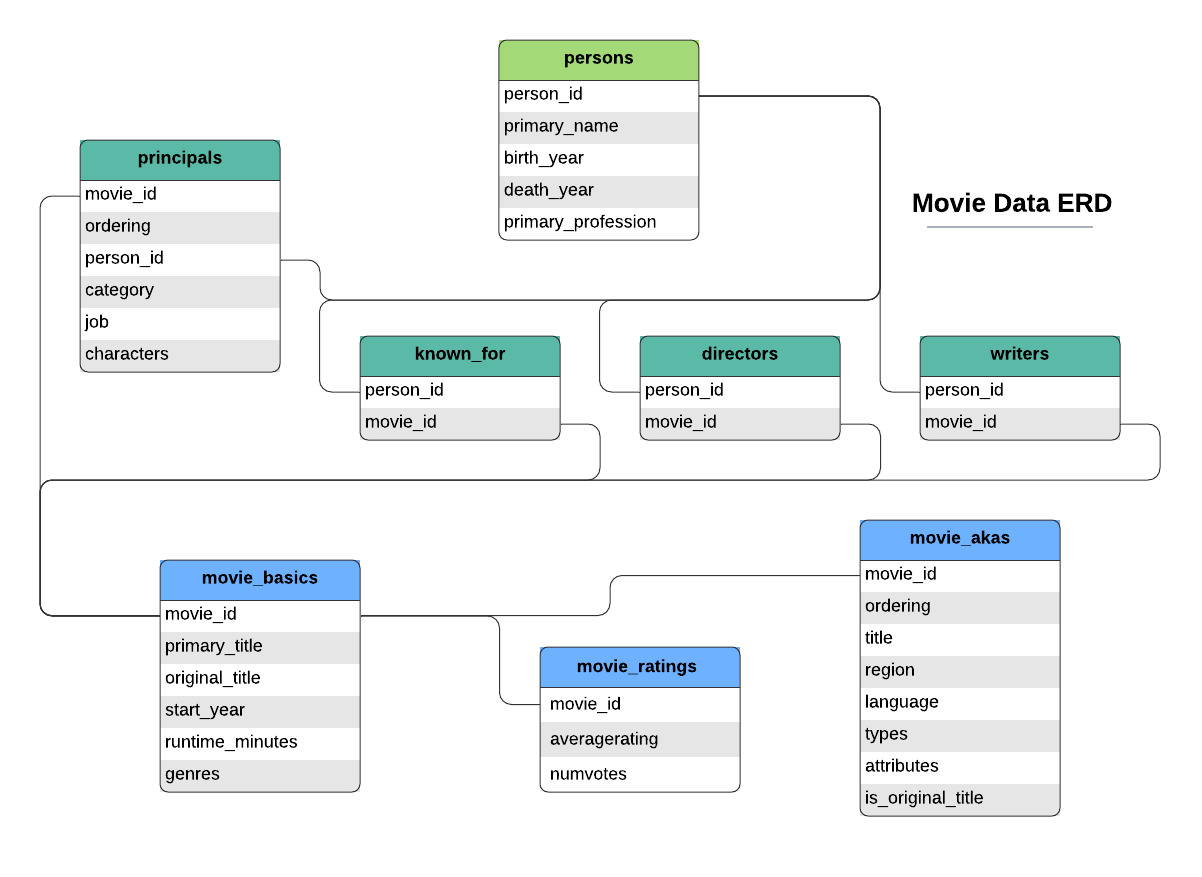

After they have been given an inital look-through we will choose which ones to explore and clean further

In [1]:
#importing the necessary packages
import pandas as pd
import sqlite3

## Reading in the Box Office Mojo Dataset

In [2]:
df1 = pd.read_csv('data/bom.movie_gross.csv')

In [3]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Here we see that the Box Office Mojo dataset has a good amount of entries. Not too many missing values except for in one column - foreign_gross. Overall a good dataset to use.

## Reading The Movie Database Dataset

In [5]:
df2 = pd.read_csv('data/tmdb.movies.csv', index_col=0)
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


This is an interesting dataset to consider. We particularly like the popularity columns - it would be nice to further see the relationshp between profit/return on investment and popularity. There are no missing values which are a plus but could change the data type of release_date to datetime type

## The Numbers Dataset

In [7]:
df3 = pd.read_csv('data/tn.movie_budgets.csv')
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This is a really nice dataset to use. We can use each column from here and there are no missing values.

## Rotten Tomatoes - Movie Dataset

In [9]:
df4 = pd.read_table('data/rt.movie_info.tsv')
df4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Here in the Rotten Tomatoes Review Table we have good columns that we can use for interesting analysis such as director, genre, writer, and runtime. However it does not have a title so would have to find another way to join it to the master dataset. There is also quite a few missing values.

## Rotten Tomatoes - Reviews Dataset

In [12]:
df5 = pd.read_table("Data/rt.reviews.tsv",encoding='latin1')
df5.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


There are a good amount of entries in this dataset. It has some useful columns such as review and rating. However some limitations are fluctuations of missing values and not having the title of the movie.

## IMDb - Dataset

In [16]:
#connecting to the SQL Database
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [17]:
#looking at the database schema
df6 = pd.read_sql("""
SELECT *
FROM 
    sqlite_master
""", conn)
df6.head(10)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Now we are going to look at each table within the database to determine which would be the best tables (if any) to use for the master dataset

In [18]:
#movie_basics
df6 = pd.read_sql("""
SELECT *
FROM 
    movie_basics
""", conn)
df6.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Can already see that there are some missing values that we need to fill in but the columns are useful to us are genres, and primary_title

In [19]:
#directors
df6 = pd.read_sql("""
SELECT *
FROM 
    directors
""", conn)
df6.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Not a very useful table can discard.

In [21]:
#known_for
df6 = pd.read_sql("""
SELECT *
FROM 
    known_for
""", conn)
df6.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


Not a very useful table can discard.

In [22]:
#movie_akas
df6 = pd.read_sql("""
SELECT *
FROM 
    movie_akas
""", conn)
df6.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


This is an intersting table to look at since it goes by region but we would like to focus on domestic US or worldwide as whole. So other than that not very useful.

In [24]:
#movie_ratings
df6 = pd.read_sql("""
SELECT *
FROM 
    movie_ratings
""", conn)
df6.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This is a nice table that we can use for ratings. Also checked if there were any null values and there isn't any which is a plus.

In [27]:
#persons
df6 = pd.read_sql("""
SELECT *
FROM 
    persons
""", conn)
df6.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


This is an interesting table can take the name and the profession and see if thats has anything to do with movie success.

In [28]:
#principals
df6 = pd.read_sql("""
SELECT *
FROM 
    principals
""", conn)
df6.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


This table is ideal if we want to join the persons table with movie. The category column as well is something to look at.

In [29]:
#writers
df6 = pd.read_sql("""
SELECT *
FROM 
    writers
""", conn)
df6.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


Not a very useful table can discard.

Now we come to the exciting part - the joins. We have decided that we want the following tables:
- movie_basics
- movie_ratings
- persons
- principals

The rest we will not be using for our data analysis

In [37]:
# To join them together first join movie_basics and movie_ratings
movie_joined = pd.read_sql("""
SELECT
    movie_id,
    primary_title, 
    genres,
    averagerating, 
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""", conn)

movie_joined.head()

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


In [38]:
movie_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


Have some missing values in genres but good enough for the amount of entries that we have.

In [45]:
# Now joining persons and principals
profession_joined = pd.read_sql("""
SELECT
    primary_name,
    movie_id,
    category
FROM
    persons
JOIN
    principals
    USING(person_id)
    
""", conn)

profession_joined.head()

,primary_name,movie_id,category
0,Mary Ellen Bauder,tt2398241,producer
1,Joseph Bauer,tt0433397,composer
2,Joseph Bauer,tt1681372,composer
3,Joseph Bauer,tt2281215,composer
4,Joseph Bauer,tt2387710,composer


In [46]:
profession_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027912 entries, 0 to 1027911
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   primary_name  1027912 non-null  object
 1   movie_id      1027912 non-null  object
 2   category      1027912 non-null  object
dtypes: object(3)
memory usage: 23.5+ MB


Have no missing values in this dataset; although it is substantially larger than the movie_joined dataset.

In [47]:
#joing the two dataframes into one large dataframe

#grabbing the value counts for each entry
profession_joined['category'].value_counts()

actor                  256561
director               146393
actress                146124
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65392
editor                  55512
production_designer      9373
archive_footage          3306
archive_sound              16
Name: category, dtype: int64

In [48]:
# First let's grab only the relevant information we want from the profession_joined dataset
profession_joined = profession_joined[(profession_joined['category'] == 'actor') | 
                                      (profession_joined['category'] == 'actress') | 
                                      (profession_joined['category'] == 'director') |
                                      (profession_joined['category'] == 'producer')]

In [49]:
#merging the two dataframes together
movie_profession = movie_joined.merge(profession_joined)

In [51]:
#checking shape to mke sure the dataframes merged correctly
movie_profession.shape

(406119, 7)

In [52]:
#sanity check
movie_profession.head()

,movie_id,primary_title,genres,averagerating,numvotes,primary_name,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,director
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Vyjayanthimala,actress
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Balraj Sahni,actor
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Sanjeev Kumar,actor
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77,Dilip Kumar,actor


In [53]:
#converting the dataframe into a csv file
movie_profession.to_csv('movie_profession.csv')